In [17]:
# Program Prediksi laki-laki Gamer
import pandas as pd

gaji = {
    'usia': [21,23,24,25,27],
    'gaji': [5000000, 7500000, 7500000, 8000000, 10000000],
    'status_gamer': ['Non', 'Ya', 'Ya', 'Non', 'Non']
    }

gaji_l = pd.DataFrame(gaji)
gaji_l

,usia,gaji,status_gamer
0,21,5000000,Non
1,23,7500000,Ya
2,24,7500000,Ya
3,25,8000000,Non
4,27,10000000,Non


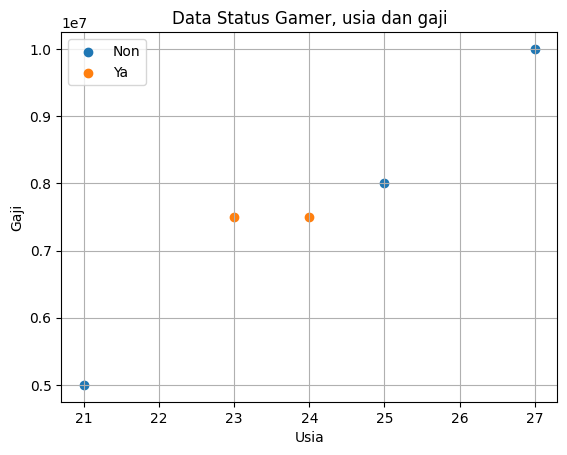

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in gaji_l.groupby('status_gamer'):
    ax.scatter(d['usia'], d['gaji'], label=jk)

plt.legend(loc='upper left')
plt.title("Data Status Gamer, usia dan gaji")
plt.xlabel('Usia')
plt.ylabel('Gaji')
plt.grid(True)
plt.show()

In [19]:
import numpy as np

x_train = np.array(gaji_l[['usia', 'gaji']])
y_train = np.array(gaji_l['status_gamer'])

print(f'x_train : \n {x_train}\n')
print(f'y_train: \n {y_train}\n')

x_train : 
 [[      21  5000000]
 [      23  7500000]
 [      24  7500000]
 [      25  8000000]
 [      27 10000000]]

y_train: 
 ['Non' 'Ya' 'Ya' 'Non' 'Non']



In [28]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train : {y_train}')


y_train : [[0]
 [1]
 [1]
 [0]
 [0]]


In [23]:
y_train = y_train.flatten()
print(f'y_train : {y_train}')

y_train : ['Non' 'Ya' 'Ya' 'Non' 'Non']


In [29]:
from sklearn.neighbors import KNeighborsClassifier
K = 3
model  = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

c:\Users\RAFLY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [25]:
usia = 22
gaji = 5_000_000

x_new = np.array([usia, gaji]).reshape(1,-1)
x_new

array([[     22, 5000000]])

In [30]:
y_new = model.predict(x_new)
y_new

array([1])

In [31]:
lb.inverse_transform(y_new)

array(['Ya'], dtype='<U3')

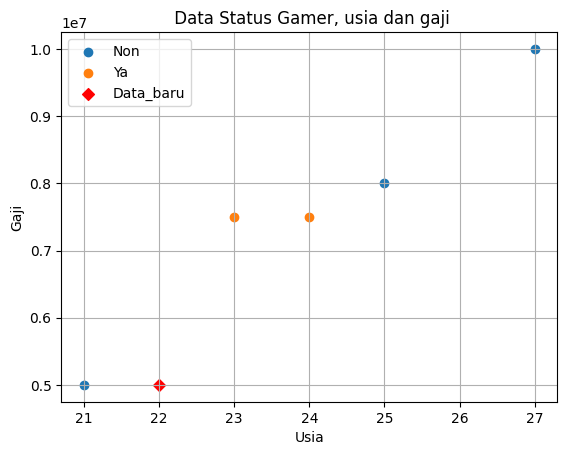

In [32]:
fig, ax = plt.subplots()
for jk, d in gaji_l.groupby('status_gamer'):
    ax.scatter(d['usia'], d['gaji'], label=jk)

plt.scatter(usia, gaji, marker='D', color='red', label='Data_baru')

plt.legend(loc='upper left')
plt.title(" Data Status Gamer, usia dan gaji")
plt.xlabel('Usia')
plt.ylabel('Gaji')
plt.grid(True)
plt.show()

In [33]:
# Kalkulasi Euclidean Distance
Data_baru = np.array([usia, gaji])
Data_baru

array([     22, 5000000])

In [34]:
x_train

array([[      21,  5000000],
       [      23,  7500000],
       [      24,  7500000],
       [      25,  8000000],
       [      27, 10000000]], dtype=int64)

In [35]:
from scipy.spatial.distance import euclidean

jarak_data = [euclidean(Data_baru, d) for d in x_train]
jarak_data 

[1.0, 2500000.0000002, 2500000.0000008, 3000000.0000015, 5000000.0000025]

In [36]:
gaji_l['jarak'] = jarak_data
gaji_l.sort_values(['jarak'])

,usia,gaji,status_gamer,jarak
0,21,5000000,Non,1.000000e+00
1,23,7500000,Ya,2.500000e+06
2,24,7500000,Ya,2.500000e+06
3,25,8000000,Non,3.000000e+06
4,27,10000000,Non,5.000000e+06


In [37]:
# EVALUASI KNN Classification Model
# Testing Set

x_test = np.array([[22, 6000000], [23, 4000000], [25, 3000000],[24, 5000000]])
y_test = lb.transform(np.array(['Ya', 'Ya', 'Non', 'Ya'])).flatten()

print(f'x_test : {x_test}\n')
print(f'y_test : {y_test}\n')

x_test : [[     22 6000000]
 [     23 4000000]
 [     25 3000000]
 [     24 5000000]]

y_test : [1 1 0 1]



In [38]:
# Prediksi terhadap Testing set

y_prediction = model.predict(x_test)
y_prediction

array([1, 1, 1, 1])

In [39]:
# METRIK EVALUASI
# Accuracy - Akurasi
# accuracy = (tp + tn) / tp + tn + fp + fn

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_prediction)
print(f'Accuracy : {accuracy}')

Accuracy : 0.75


In [40]:
# Precission - Presisi
# precission = tp / (tp + fp)

from sklearn.metrics import precision_score

precission = precision_score(y_test, y_prediction)

print(f'Precission : {precission}')

Precission : 0.75


In [41]:
# Recall
# recall = tp / (tp + fn)

from sklearn.metrics import recall_score

recall = recall_score(y_test, y_prediction)

print(f'Recall : {recall}')

Recall : 1.0


In [42]:
# F1 Score
# f1 = 2 x (precission x recall / precission + recall)

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_prediction)

print(f'F1-Score : {f1}')

F1-Score : 0.8571428571428571


In [43]:
# CLASSIFICATION REPORT 

from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_prediction)

print(f'Classification Report :\n {cls_report}')

Classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



c:\Users\RAFLY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RAFLY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RAFLY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [44]:
# Matthews Correlation Coefficient (MCC)
# MCC = (tp x tn + fp x fn) / sqrt((tp+fp) x (tp + fn) x (tn + fp) x (tn + fn))
# Batas : -1 (terburuk) sampai ke 1 (terbaik)

from sklearn.metrics import matthews_corrcoef

MCC = matthews_corrcoef(y_test, y_prediction)
print(f'MCC : {MCC}')

MCC : 0.0
